In [14]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, log_loss
import matplotlib.pyplot as plt
import numpy as np

In [15]:
data = pd.read_csv('archive/Student_performance_data _.csv')
data = data.iloc[:,1:].to_numpy()

In [16]:
Y = data[:,-1]
X = data[:,:-2]
x_train, x_, y_train, y_ = train_test_split(X,Y, test_size=0.4, random_state=1)
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)
del x_, y_

model = LinearRegression()

In [17]:
def train_plot_poly(model, x_train, y_train, x_cv, y_cv, max_degree=10, baseline=None):
    
    train_mses = []
    cv_mses = []
    models = []
    scalers = []
    degrees = range(1,max_degree+1)

    # Loop over 10 times. Each adding one more degree of polynomial higher than the last.
    for degree in degrees:

        # Add polynomial features to the training set
        poly = PolynomialFeatures(degree, include_bias=False)
        X_train_mapped = poly.fit_transform(x_train)

        # Scale the training set
        scaler_poly = StandardScaler()
        X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
        scalers.append(scaler_poly)

        # Create and train the model
        model.fit(X_train_mapped_scaled, y_train )
        models.append(model)

        # Compute the training MSE
        yhat = model.predict(X_train_mapped_scaled)
        train_mse = mean_squared_error(y_train, yhat) / 2
        train_mses.append(train_mse)

        # Add polynomial features and scale the cross-validation set
        poly = PolynomialFeatures(degree, include_bias=False)
        X_cv_mapped = poly.fit_transform(x_cv)
        X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

        # Compute the cross-validation MSE
        yhat = model.predict(X_cv_mapped_scaled)
        cv_mse = mean_squared_error(y_cv, yhat) / 2
        cv_mses.append(cv_mse)

        print(f'Degree {degree} completed.')
    
    print(train_mses)
    print(cv_mses)

    # Plot the results
    plt.plot(degrees, train_mses, marker='o', c='r', label='training MSEs'); 
    plt.plot(degrees, cv_mses, marker='o', c='b', label='CV MSEs'); 
    plt.plot(degrees, np.repeat(baseline, len(degrees)), linestyle='--', label='baseline')
    plt.title("degree of polynomial vs. train and CV MSEs")
    plt.xticks(degrees)
    plt.xlabel("degree"); 
    plt.ylabel("MSE"); 
    plt.legend()
    plt.show()

Degree 1 completed.
Degree 2 completed.
Degree 3 completed.
Degree 4 completed.
Degree 5 completed.
Degree 6 completed.
Degree 7 completed.
Degree 8 completed.
[0.29805916993565895, 0.21740167828164522, 0.16914656223777808, 0.038986862483749045, 5.879514511989611e-27, 3.1404150991204662e-27, 4.28786892863185e-27, 1.2094942626720157e-26]
[0.3431036488631433, 0.25877551632252277, 0.3526036079624631, 1.1457033973192458e+19, 24.33914185154065, 22.458462805829953, 23.330118658487653, 25.960642170956874]


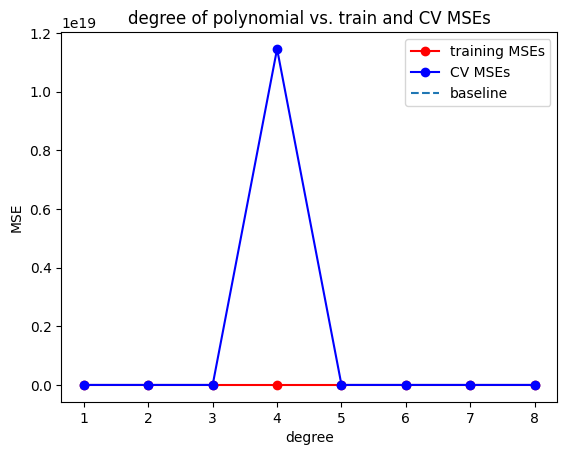

In [18]:
train_plot_poly(model, x_train, y_train, x_cv, y_cv, 8)

In [ ]:
def eval_cat_err(y, yhat):
    """ 
    Calculate the categorization error
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:|
      cerr: (scalar)             
    """
    m = len(y)
    incorrect = 0
    for i in range(m):
    ### START CODE HERE ### 
        if y[i] != yhat[i]:
           incorrect += 1
    
    cerr = incorrect / m
    
    ### END CODE HERE ### 
    
    return(cerr)